In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read datasets
folder_path = "OGcsvs/"

gen9_abilities = pd.read_csv(folder_path + 'gen9_pokemon_abilities.csv', encoding='ISO-8859-1')
gen9_moves = pd.read_csv(folder_path + 'gen9_pokemon_moves.csv', encoding='ISO-8859-1')
gen9_stats = pd.read_csv(folder_path + 'gen9_pokemon_stats.csv', encoding='ISO-8859-1')

pokedex_0520 = pd.read_csv(folder_path + 'pokedex_(Update_05.20).csv', encoding='ISO-8859-1')

In [3]:
# Print column names for each dataset
print("Column names for Generation 9 Abilities:")
print(gen9_abilities.columns.tolist())

print("\nColumn names for Generation 9 Moves:")
print(gen9_moves.columns.tolist())

print("\nColumn names for Generation 9 Stats:")
print(gen9_stats.columns.tolist())

print("\nColumn names for Pokedex (Update 05.20):")
print(pokedex_0520.columns.tolist())

Column names for Generation 9 Abilities:
['Ability', 'Pokemon', "Game's Text", 'In-Depth Effect', 'Ability URL']

Column names for Generation 9 Moves:
['Move', 'Type', 'Category', 'Power Points', 'Base Power', 'Accuracy', 'Battle Effect', 'Secondary Effect', 'Secondary Rate', 'Critical Rate', 'Speed Priority', 'Attack URL', 'Pokemon']

Column names for Generation 9 Stats:
['Pokemon', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed', 'Weakness-Normal', 'Weakness-Fire', 'Weakness-Water', 'Weakness-Electric', 'Weakness-Grass', 'Weakness-Ice', 'Weakness-Fighting', 'Weakness-Poison', 'Weakness-Ground', 'Weakness-Flying', 'Weakness-Psychic', 'Weakness-Bug', 'Weakness-Rock', 'Weakness-Ghost', 'Weakness-Dragon', 'Weakness-Dark', 'Weakness-Steel', 'Weakness-Fairy']

Column names for Pokedex (Update 05.20):
['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name', 'generation', 'status', 'species', 'type_number', 'type_1', 'type_2', 'heig

Vizualiazations

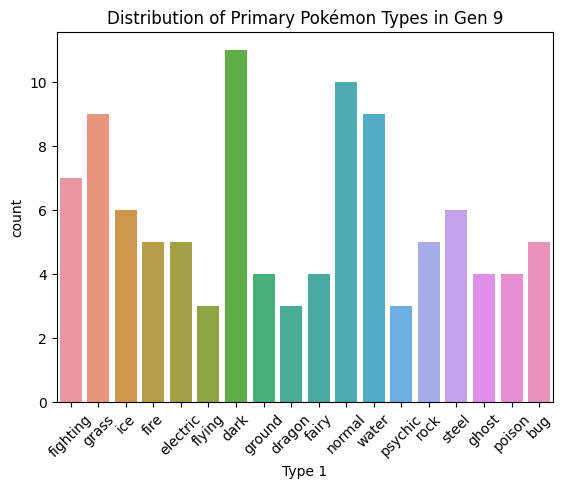

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Pokémon Types (from Generation 9 Stats)
sns.countplot(data=gen9_stats, x='Type 1')
plt.title('Distribution of Primary Pokémon Types in Gen 9')
plt.xticks(rotation=45)
plt.show()

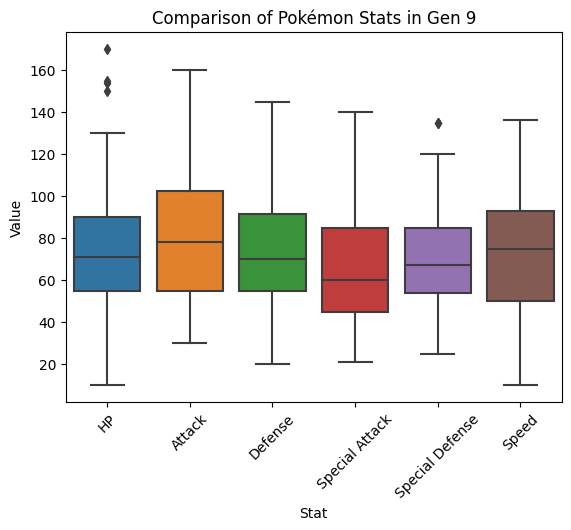

In [5]:
#Comparison of Average Stats (from Generation 9 Stats)
stats_columns = ['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']
melted_stats = gen9_stats.melt(value_vars=stats_columns, var_name='Stat', value_name='Value')

sns.boxplot(data=melted_stats, x='Stat', y='Value')
plt.title('Comparison of Pokémon Stats in Gen 9')
plt.xticks(rotation=45)
plt.show()


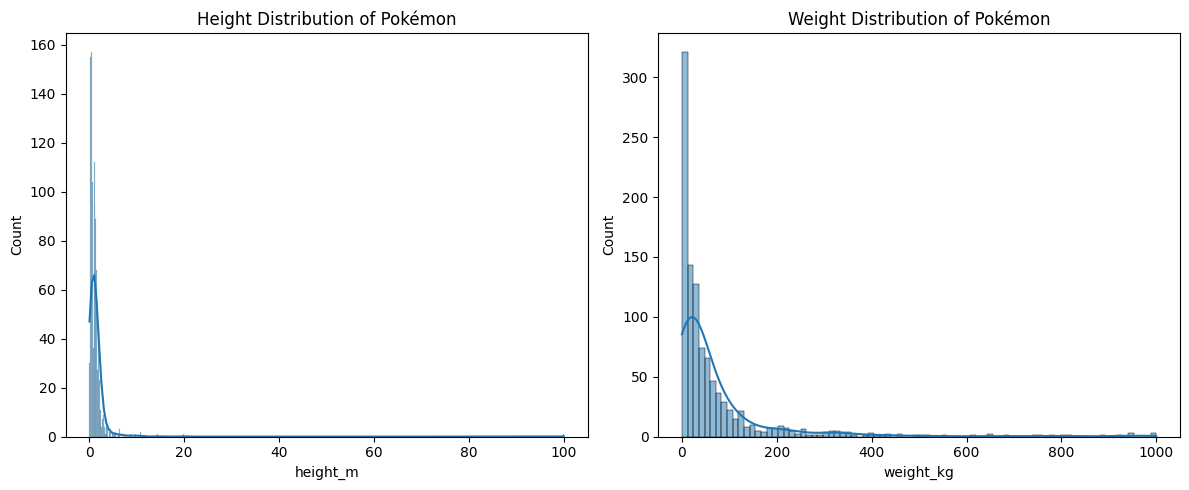

In [6]:
#Height and Weight Distribution (from Pokedex)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(pokedex_0520['height_m'], kde=True)
plt.title('Height Distribution of Pokémon')

plt.subplot(1, 2, 2)
sns.histplot(pokedex_0520['weight_kg'], kde=True)
plt.title('Weight Distribution of Pokémon')

plt.tight_layout()
plt.show()


Pre-processing (the FUN part)

In [7]:
#Check missing values for first 3 data sets
print("Missing values in Generation 9 Abilities:")
print(gen9_abilities.isnull().sum())

print("Missing values in Generation 9 Moves:")
print(gen9_moves.isnull().sum())

print("Missing values in Generation 9 Stats:")
print(gen9_stats.isnull().sum())

Missing values in Generation 9 Abilities:
Ability             0
Pokemon             0
Game's Text         0
In-Depth Effect    42
Ability URL         0
dtype: int64
Missing values in Generation 9 Moves:
Move                0
Type                0
Category            0
Power Points        0
Base Power          0
Accuracy            0
Battle Effect       0
Secondary Effect    0
Secondary Rate      0
Critical Rate       0
Speed Priority      0
Attack URL          0
Pokemon             0
dtype: int64
Missing values in Generation 9 Stats:
Pokemon               0
Type 1                0
Type 2               41
HP                    0
Attack                0
Defense               0
Special Attack        0
Special Defense       0
Speed                 0
Weakness-Normal       0
Weakness-Fire         0
Weakness-Water        0
Weakness-Electric     0
Weakness-Grass        0
Weakness-Ice          0
Weakness-Fighting     0
Weakness-Poison       0
Weakness-Ground       0
Weakness-Flying       0
Weak

In [8]:
gen9_abilities["In-Depth Effect"].fillna(gen9_abilities["Game's Text"], inplace=True)
gen9_abilities.drop(columns=["Game's Text", "Ability URL"], inplace=True)
gen9_abilities.rename(columns={"In-Depth Effect": "Effect"}, inplace=True)
gen9_abilities.head()

,Ability,Pokemon,Effect
0,Anger Shell,Klawf,When an attack causes its HP to drop to half o...
1,Anticipation,Flittle,Warns when the foe knows 1-hit KO or super-eff...
2,Armor Tail,Farigiraf,The mysterious tail covering the Pokémon's hea...
3,Aroma Veil,Lechonk,Protects itself and its allies from attacks th...
4,Aroma Veil,Dachsbun,Protects itself and its allies from attacks th...


In [9]:
gen9_abilities.sort_values(by="Pokemon", inplace=True)
gen9_abilities = gen9_abilities[["Pokemon"] + [col for col in gen9_abilities.columns if col != "Pokemon"]]
gen9_abilities.head()

,Pokemon,Ability,Effect
59,Annihilape,Inner Focus,This Pokémon will not flinch. Does not prevent...
27,Annihilape,Defiant,Attack is raised by two stages when the Pokémo...
203,Annihilape,Vital Spirit,The Pokémon cannot be Asleep while having this...
52,Arboliva,Harvest,The Pokémon has a 50% chance of restoring a co...
148,Arboliva,Seed Sower,Turns the ground into Grassy Terrain when the ...


In [10]:
#moving on to gen9_moves
gen9_moves.drop(columns=["Battle Effect"], inplace=True)
gen9_moves.rename(columns={"Secondary Effect": "Effects"}, inplace=True)
gen9_moves.drop(columns=["Attack URL", "Pokemon", "Secondary Rate"], inplace=True)
gen9_moves.head()

,Move,Type,Category,Power Points,Base Power,Accuracy,Effects,Critical Rate,Speed Priority
0,Absorb,grass,special,25,20,100,User recovers half the damage inflicted.,0.0417,0
1,Absorb,grass,special,25,20,100,User recovers half the damage inflicted.,0.0417,0
2,Absorb,grass,special,25,20,100,User recovers half the damage inflicted.,0.0417,0
3,Absorb,grass,special,25,20,100,User recovers half the damage inflicted.,0.0417,0
4,Absorb,grass,special,25,20,100,User recovers half the damage inflicted.,0.0417,0


In [11]:
move_name_counts = gen9_moves["Move"].value_counts()
move_name_counts

Move
Protect        103
Tera Blast     103
Endure         102
Substitute     101
Rest           100
              ... 
Petal Dance      1
Pin Missile      1
Inferno          1
Sheer Cold       1
Rage Fist        1
Name: count, Length: 456, dtype: int64

In [12]:
gen9_moves.drop_duplicates(subset="Move", keep="first", inplace=True)
gen9_moves.reset_index(drop=True, inplace=True)
gen9_moves.head()

,Move,Type,Category,Power Points,Base Power,Accuracy,Effects,Critical Rate,Speed Priority
0,Absorb,grass,special,25,20,100,User recovers half the damage inflicted.,0.0417,0
1,Acid Armor,poison,other,20,0,101,Raises user's Defense two stages.,0.0000,0
2,Acid Spray,poison,special,20,40,100,Lowers opponent's Special Defense two stages.,0.0417,0
3,Acrobatics,flying,physical,15,55,100,Increases damage by 100% if user is not holdin...,0.0417,0
4,Acupressure,normal,other,30,0,101,Raises one of the user's stats randomly by two...,0.0000,0


In [13]:
columns_to_drop = [
    "Weakness-Normal", "Weakness-Fire", "Weakness-Water", "Weakness-Electric",
    "Weakness-Grass", "Weakness-Ice", "Weakness-Fighting", "Weakness-Poison",
    "Weakness-Ground", "Weakness-Flying", "Weakness-Psychic", "Weakness-Bug",
    "Weakness-Rock", "Weakness-Ghost", "Weakness-Dragon", "Weakness-Dark",
    "Weakness-Steel", "Weakness-Fairy", 
]

gen9_stats.drop(columns=columns_to_drop, inplace=True)
gen9_stats.head()

,Pokemon,Type 1,Type 2,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,Annihilape,fighting,ghost,110,115,80,50,90,90
1,Arboliva,grass,normal,78,69,90,125,109,39
2,Arctibax,ice,dragon,90,95,66,45,65,62
3,Armarouge,fire,psychic,85,60,100,125,80,75
4,Baxcalibur,ice,dragon,115,145,92,75,86,87


In [14]:
gen9_stats["Type 2"].fillna("None", inplace=True)
gen9_stats.head()

,Pokemon,Type 1,Type 2,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,Annihilape,fighting,ghost,110,115,80,50,90,90
1,Arboliva,grass,normal,78,69,90,125,109,39
2,Arctibax,ice,dragon,90,95,66,45,65,62
3,Armarouge,fire,psychic,85,60,100,125,80,75
4,Baxcalibur,ice,dragon,115,145,92,75,86,87


In [15]:
print("Missing values in Generation 9 Stats:")
print(gen9_stats.isnull().sum())

Missing values in Generation 9 Stats:
Pokemon            0
Type 1             0
Type 2             0
HP                 0
Attack             0
Defense            0
Special Attack     0
Special Defense    0
Speed              0
dtype: int64


In [16]:
folder_path = "cleanedCSVs/"

gen9_abilities_path = folder_path + "gen9_abilities_cleaned.csv"
gen9_moves_path = folder_path + "gen9_moves_cleaned.csv"
gen9_stats_path = folder_path + "gen9_stats_cleaned.csv"

gen9_abilities.to_csv(gen9_abilities_path, index=False)
gen9_moves.to_csv(gen9_moves_path, index=False)
gen9_stats.to_csv(gen9_stats_path, index=False)

print(f"gen9_abilities cleaned dataset saved to {gen9_abilities_path}")
print(f"gen9_moves cleaned dataset saved to {gen9_moves_path}")
print(f"gen9_stats cleaned dataset saved to {gen9_stats_path}")

gen9_abilities cleaned dataset saved to cleanedCSVs/gen9_abilities_cleaned.csv
gen9_moves cleaned dataset saved to cleanedCSVs/gen9_moves_cleaned.csv
gen9_stats cleaned dataset saved to cleanedCSVs/gen9_stats_cleaned.csv


In [17]:
#I deleted the other 2 datasets becuase I relizaed they were just outdated verisions (I didnt plan for this ngl)
print(pokedex_0520.columns)

Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name',
       'generation', 'status', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')


In [18]:
columns_to_drop = [
    'catch_rate', 'base_friendship', 'base_experience', 'growth_rate', 'egg_type_number',
    'egg_type_1', 'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
    'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice',
    'against_fight', 'against_poison', 'against_ground', 'against_flying', 'against_psychic',
    'against_bug', 'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
    'against_steel', 'against_fairy', 'height_m', 'weight_kg', 'abilities_number',
    'ability_1', 'ability_2', 'ability_hidden', 'total_points',
    'german_name', 'japanese_name', 'status', 
]


pokedex_0520.drop(columns=columns_to_drop, inplace=True)
pokedex_0520.head()


,Unnamed: 0,pokedex_number,name,generation,species,type_number,type_1,type_2,hp,attack,defense,sp_attack,sp_defense,speed
0,0,1,Bulbasaur,1,Seed PokÃ©mon,2,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0
1,1,2,Ivysaur,1,Seed PokÃ©mon,2,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0
2,2,3,Venusaur,1,Seed PokÃ©mon,2,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0
3,3,3,Mega Venusaur,1,Seed PokÃ©mon,2,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0
4,4,4,Charmander,1,Lizard PokÃ©mon,1,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0


In [19]:
columns_to_drop = [
    'Unnamed: 0', 'species', 'type_number'
]

pokedex_0520.drop(columns=columns_to_drop, inplace=True)

In [20]:
print("pokedex_0520 DataFrame:")
print(pokedex_0520.head())

print("\ngen9_stats DataFrame:")
print(gen9_stats.head())

pokedex_0520 DataFrame:
   pokedex_number           name  generation type_1  type_2    hp  attack   
0               1      Bulbasaur           1  Grass  Poison  45.0    49.0  \
1               2        Ivysaur           1  Grass  Poison  60.0    62.0   
2               3       Venusaur           1  Grass  Poison  80.0    82.0   
3               3  Mega Venusaur           1  Grass  Poison  80.0   100.0   
4               4     Charmander           1   Fire     NaN  39.0    52.0   

   defense  sp_attack  sp_defense  speed  
0     49.0       65.0        65.0   45.0  
1     63.0       80.0        80.0   60.0  
2     83.0      100.0       100.0   80.0  
3    123.0      122.0       120.0   80.0  
4     43.0       60.0        50.0   65.0  

gen9_stats DataFrame:
      Pokemon    Type 1   Type 2   HP  Attack  Defense  Special Attack   
0  Annihilape  fighting    ghost  110     115       80              50  \
1    Arboliva     grass   normal   78      69       90             125   
2    Arcti

In [21]:
gen9_stats["Generation"] = 9

pokedex_0520.rename(columns={
    'name': 'Pokemon',
    'type_1': 'Type 1',
    'type_2': 'Type 2',
    'generation': 'Generation',
    'hp': 'HP',
    'attack' : 'Attack',
    'defense': 'Defense',
    'sp_attack': 'Special Attack',
    'sp_defense': 'Special Defense',
    'speed': 'Speed'
}, inplace=True)

# Display the first few rows of the modified DataFrame
pokedex_0520.head()

,pokedex_number,Pokemon,Generation,Type 1,Type 2,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,1,Bulbasaur,1,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0
1,2,Ivysaur,1,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0
2,3,Venusaur,1,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0
3,3,Mega Venusaur,1,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0
4,4,Charmander,1,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0


In [22]:
pokedex_0520.drop(columns=["pokedex_number"], inplace=True)

In [23]:
column_order = [
    'Pokemon', 'Type 1', 'Type 2', 'HP', 'Defense', 'Special Attack', 
    'Special Defense', 'Speed', 'Generation'
]

stat_columns = ['HP', 'Defense', 'Special Attack', 'Special Defense', 'Speed']
pokedex_0520[stat_columns] = pokedex_0520[stat_columns].astype(int)

pokedex_0520["Type 2"].fillna("None", inplace=True)

pokedex_0520 = pokedex_0520[column_order]
pokedex_0520.head()

,Pokemon,Type 1,Type 2,HP,Defense,Special Attack,Special Defense,Speed,Generation
0,Bulbasaur,Grass,Poison,45,49,65,65,45,1
1,Ivysaur,Grass,Poison,60,63,80,80,60,1
2,Venusaur,Grass,Poison,80,83,100,100,80,1
3,Mega Venusaur,Grass,Poison,80,123,122,120,80,1
4,Charmander,Fire,None,39,43,60,50,65,1


In [24]:
gen9_stats.head()

,Pokemon,Type 1,Type 2,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation
0,Annihilape,fighting,ghost,110,115,80,50,90,90,9
1,Arboliva,grass,normal,78,69,90,125,109,39,9
2,Arctibax,ice,dragon,90,95,66,45,65,62,9
3,Armarouge,fire,psychic,85,60,100,125,80,75,9
4,Baxcalibur,ice,dragon,115,145,92,75,86,87,9


In [25]:
folder_path = "cleanedCSVs/"

pokedex_0520_path = folder_path + "pokedex_0520_cleaned.csv"
gen9_stats_path = folder_path + "gen9_stats_cleaned.csv"

pokedex_0520.to_csv(pokedex_0520_path, index=False)
gen9_stats.to_csv(gen9_stats_path, index=False)

print(f"pokedex_0520 cleaned dataset saved to {pokedex_0520_path}")
print(f"gen9_stats cleaned dataset saved to {gen9_stats_path}")


pokedex_0520 cleaned dataset saved to cleanedCSVs/pokedex_0520_cleaned.csv
gen9_stats cleaned dataset saved to cleanedCSVs/gen9_stats_cleaned.csv


In [26]:
pokedex_0520 = pd.read_csv('cleanedCSVs/pokedex_0520_cleaned.csv', encoding='ISO-8859-1')
gen9_stats = pd.read_csv('cleanedCSVs/gen9_stats_cleaned.csv', encoding='ISO-8859-1')

combined_pokemon = pd.concat([pokedex_0520, gen9_stats], ignore_index=True)
combined_pokemon.to_csv('pokemon.csv', index=False)

print("Combined dataset saved as 'pokemon.csv'")

Combined dataset saved as 'pokemon.csv'


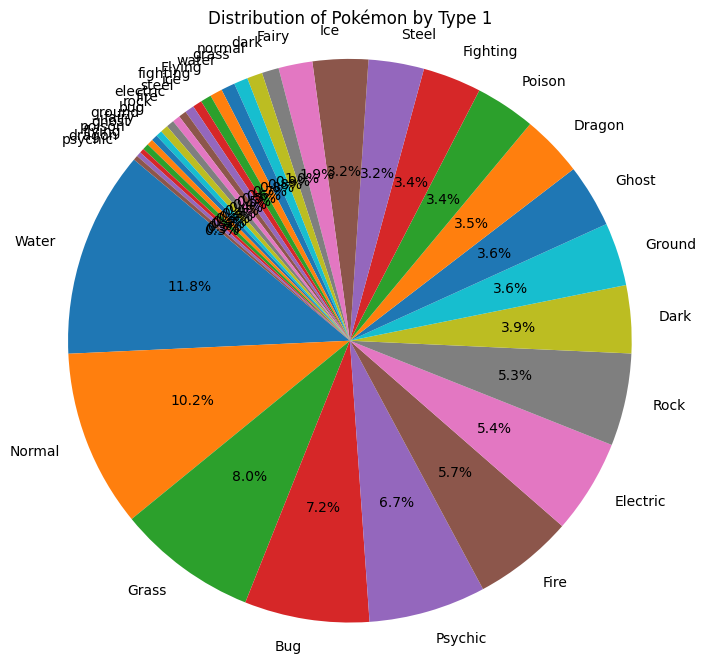

In [27]:
#Final visualizations

df = pd.read_csv('pokemon.csv', encoding='ISO-8859-1')
type1_counts = df['Type 1'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(type1_counts, labels=type1_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pokémon by Type 1')
plt.axis('equal')
plt.show()


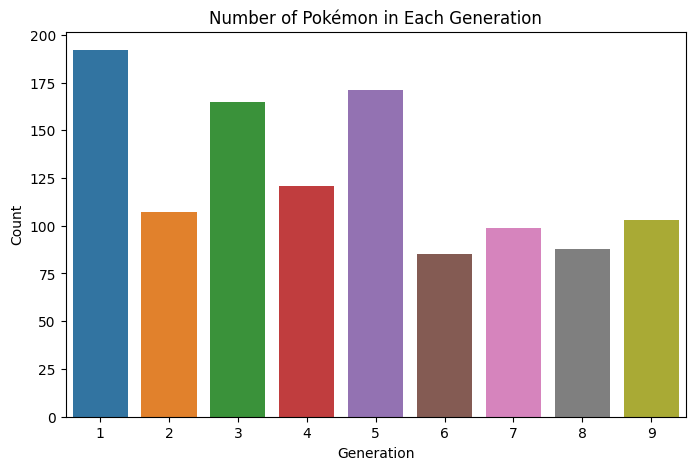

In [28]:
generation_counts = df['Generation'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=generation_counts.index, y=generation_counts.values)
plt.xlabel('Generation')
plt.ylabel('Count')
plt.title('Number of Pokémon in Each Generation')
plt.show()


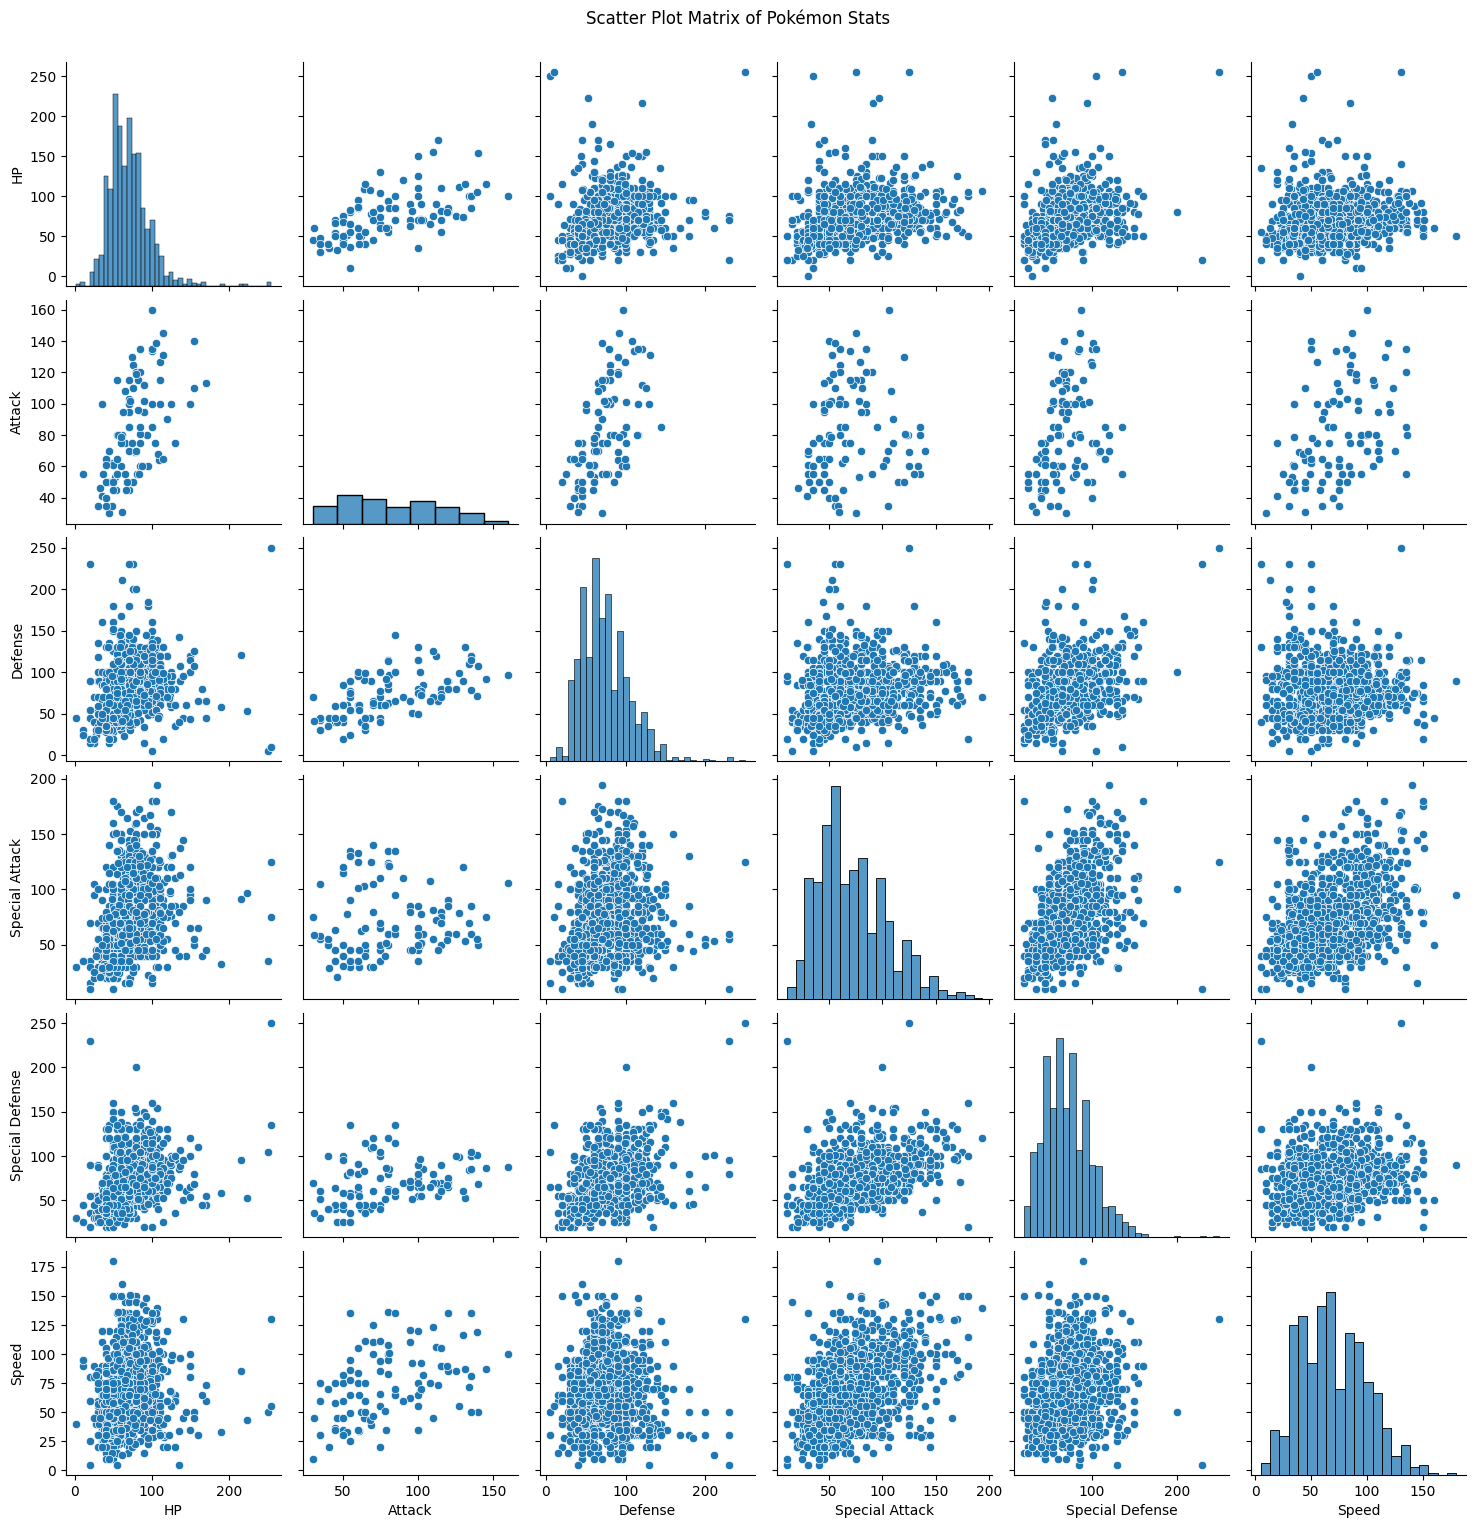

In [29]:
sns.pairplot(df[['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']])
plt.suptitle('Scatter Plot Matrix of Pokémon Stats', y=1.02)
plt.show()


Markdown

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = df.drop('Pokemon', axis=1)
df = pd.get_dummies(df, columns=['Type 1', 'Type 2'])

X = df.drop('HP', axis=1)  
y = df['HP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

KeyError: "['Pokemon'] not found in axis"